In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'D:\CHURN PREDICTION FINAL YEAR PROJECT\dataset\02 Churn-Dataset - Copy.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.5,0,0,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,0,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,0,Yes


In [3]:
df.drop(columns=['customerID'], axis=1, inplace=True)

In [4]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,One year,No,Mailed check,56.95,1889.5,0,0,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,0,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,0,Yes


# Null Handling

In [5]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
numAdminTickets     0
numTechTickets      0
Churn               0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [7]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [9]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
numAdminTickets      0
numTechTickets       0
Churn                0
dtype: int64

In [8]:
df['TotalCharges'].replace(np.nan, df.TotalCharges.mean(), inplace=True)

In [9]:
df['TotalCharges'].isnull().sum()

0

# Lets Check How The Data is distributed in each columns

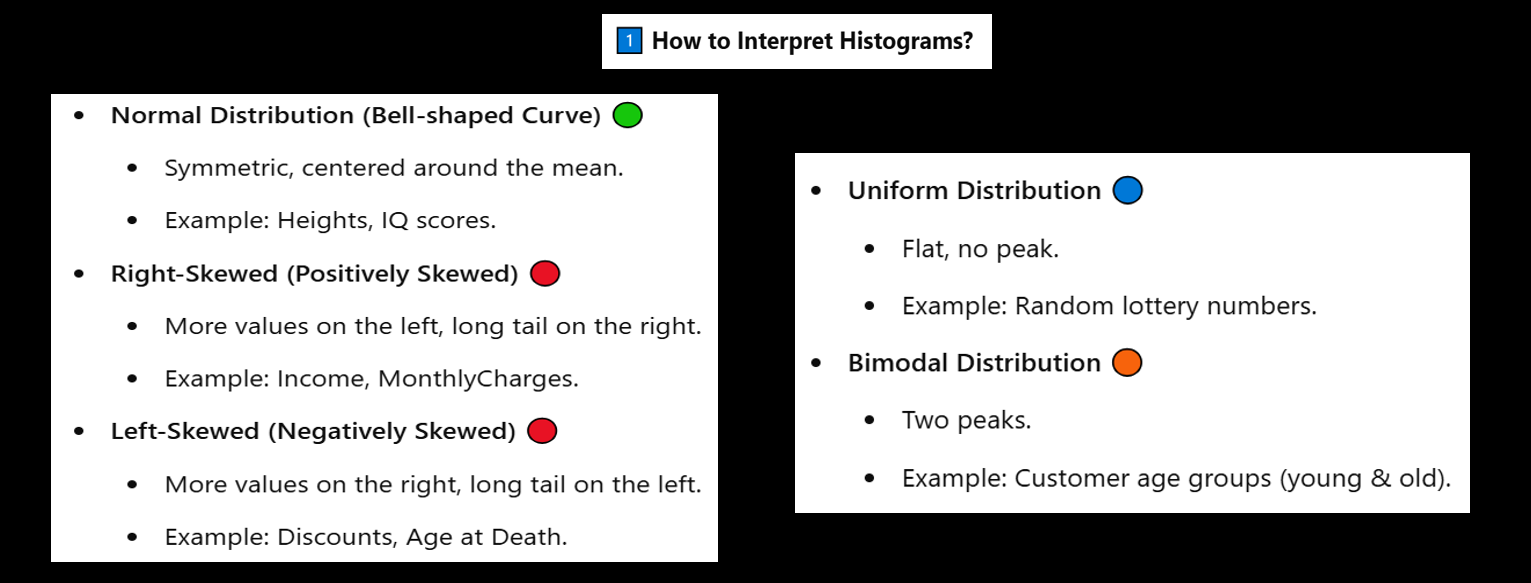

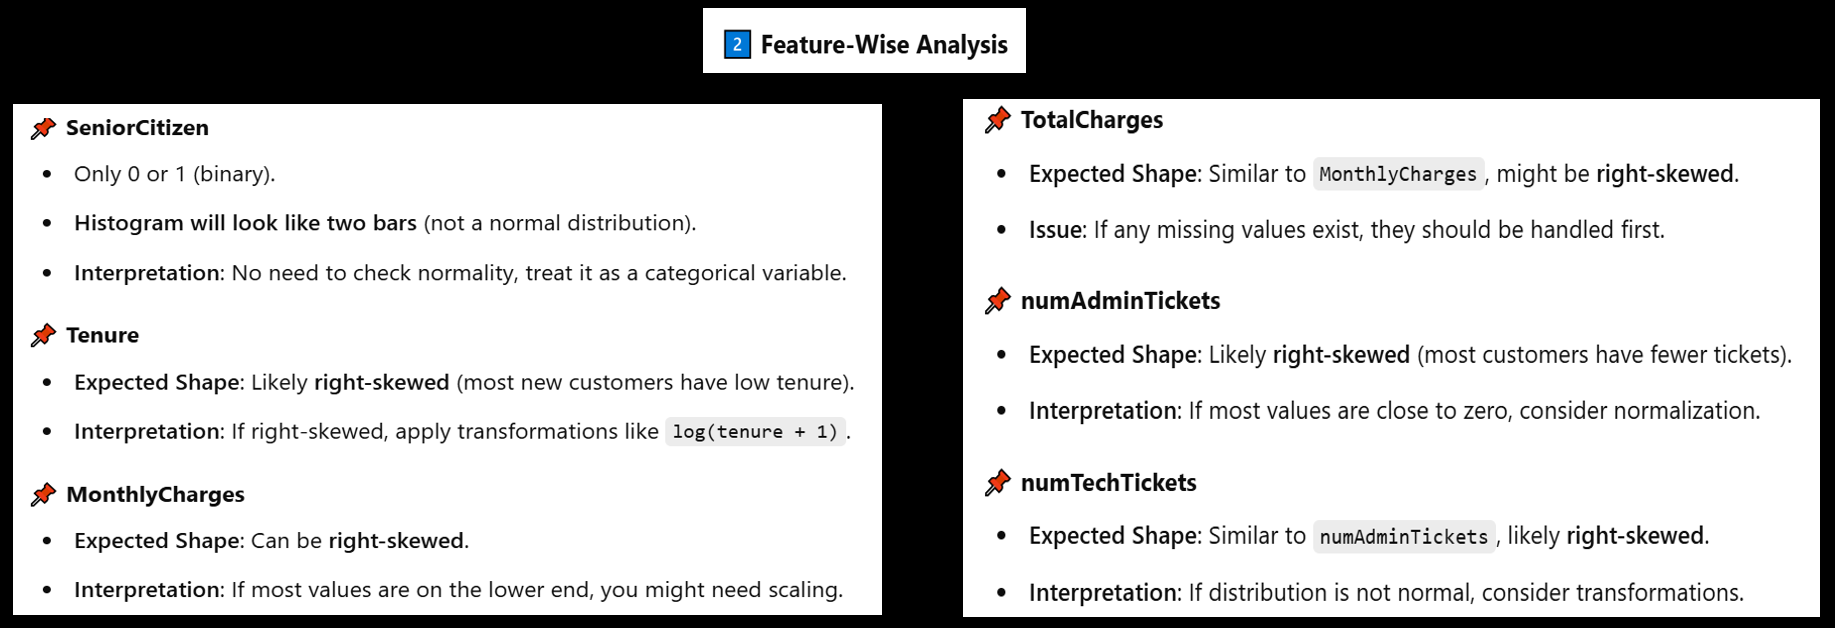

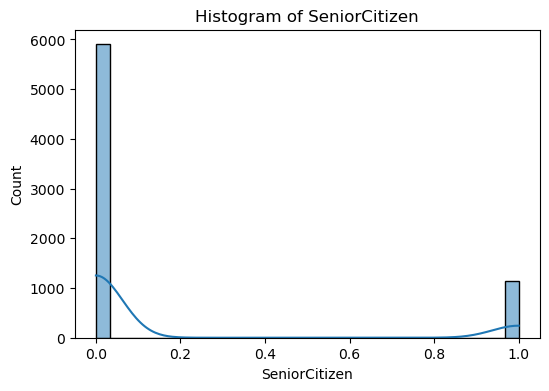

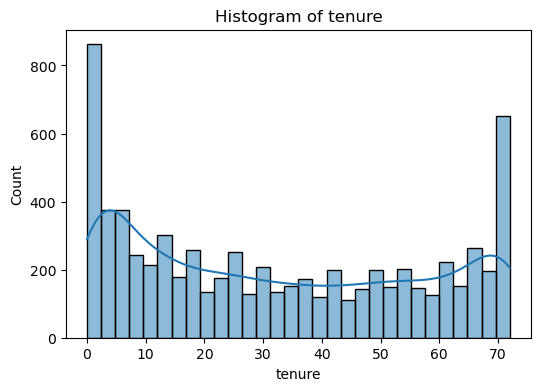

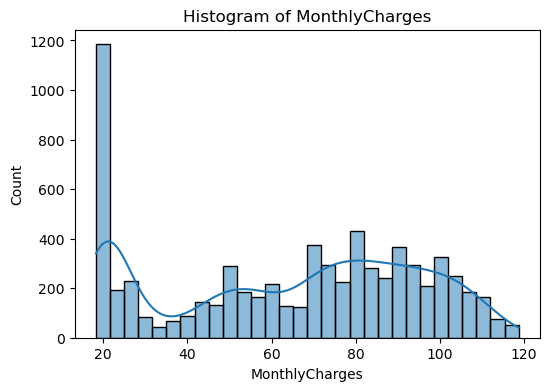

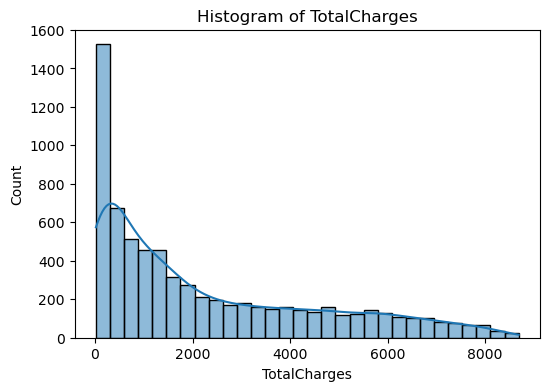

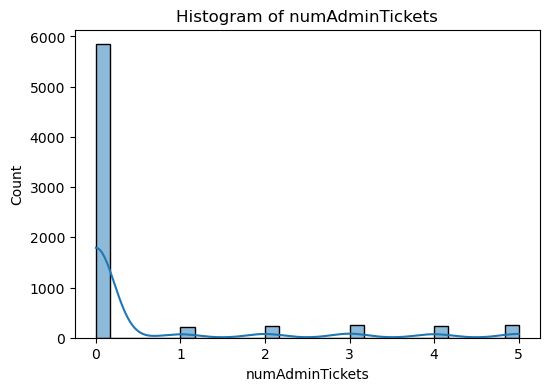

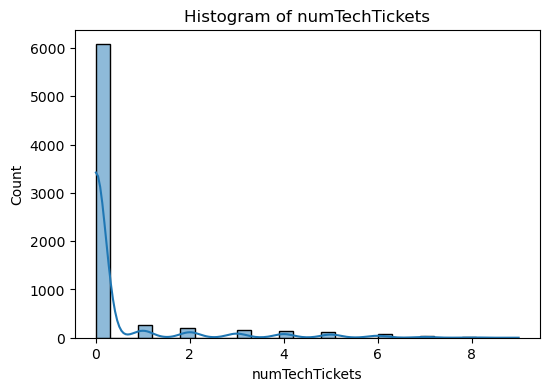

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
numerical_features = df.select_dtypes(include=['int64','float64']).columns.to_list()

for col in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Histogram of {col}")
    plt.show()


# Hypothesis Testing For Categorical Feature Engineering

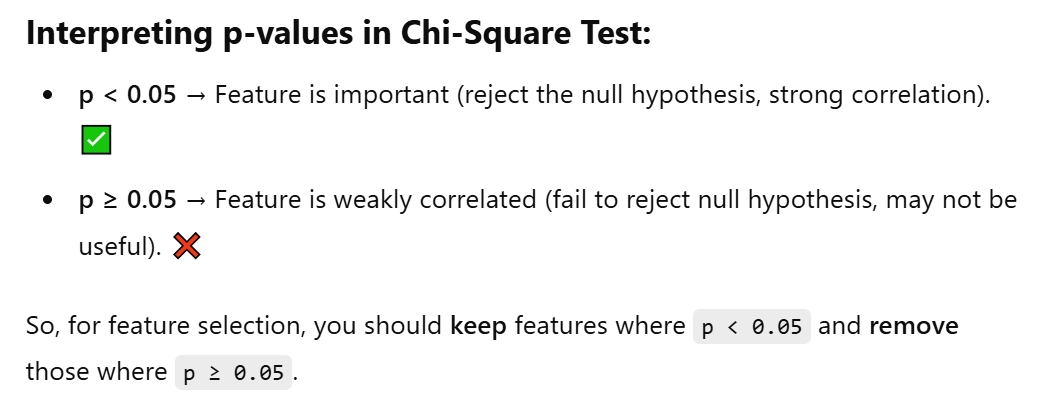

In [12]:
from scipy.stats import chi2_contingency

categorical_features = df.select_dtypes(include=['object'])
categorical_features.columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [13]:
feature_dict = {}
for col in categorical_features:
    contingency_table = pd.crosstab(df[col], df['Churn'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    feature_dict[col] = p
    print(f"Feature: {col}, p-value: {p}")

Feature: gender, p-value: 0.48657873605618596
Feature: Partner, p-value: 2.1399113440759935e-36
Feature: Dependents, p-value: 4.9249216612154196e-43
Feature: PhoneService, p-value: 0.3387825358066928
Feature: MultipleLines, p-value: 0.0034643829548773003
Feature: InternetService, p-value: 9.571788222840544e-160
Feature: OnlineSecurity, p-value: 2.661149635176552e-185
Feature: OnlineBackup, p-value: 2.0797592160864276e-131
Feature: DeviceProtection, p-value: 5.505219496457244e-122
Feature: TechSupport, p-value: 1.4430840279998987e-180
Feature: StreamingTV, p-value: 5.528994485739183e-82
Feature: StreamingMovies, p-value: 2.667756755723681e-82
Feature: Contract, p-value: 5.863038300673391e-258
Feature: PaperlessBilling, p-value: 4.073354668665985e-58
Feature: PaymentMethod, p-value: 3.6823546520097993e-140
Feature: Churn, p-value: 0.0


In [14]:
## selecting only import features
feature_engineered_categorical = [key for key, value in feature_dict.items() if value < 0.05]
feature_engineered_categorical

['Partner',
 'Dependents',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

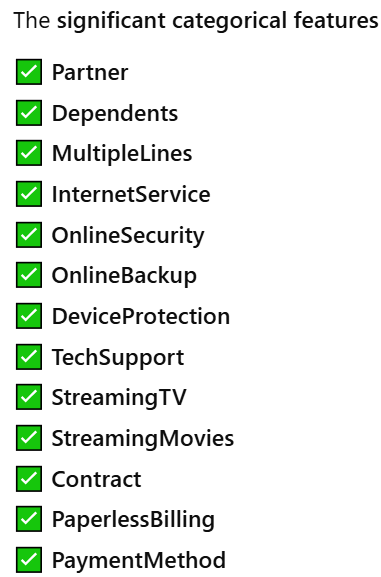

# Numerical Feature engineering

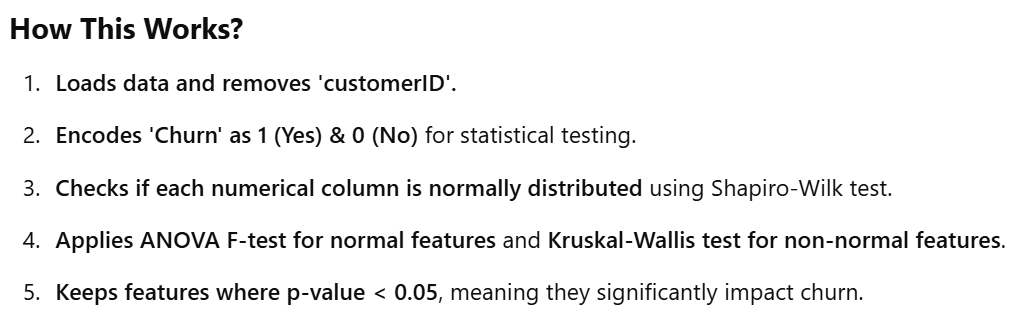

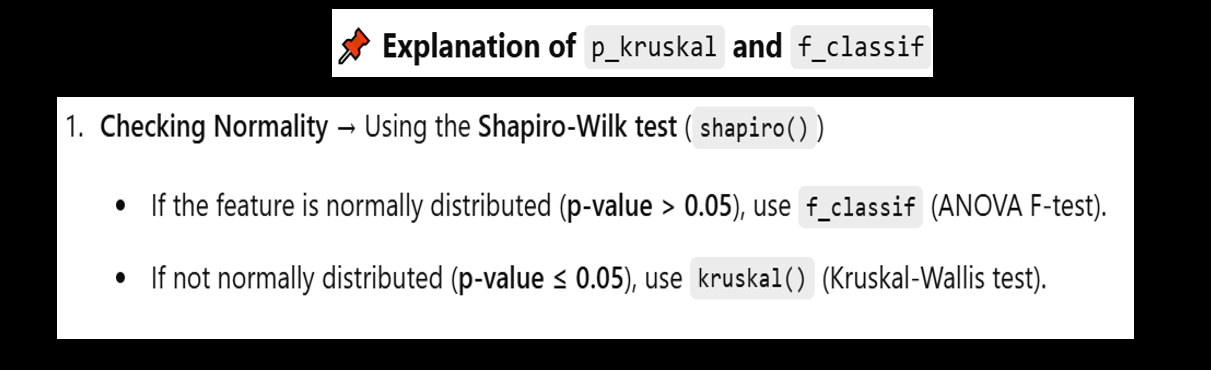

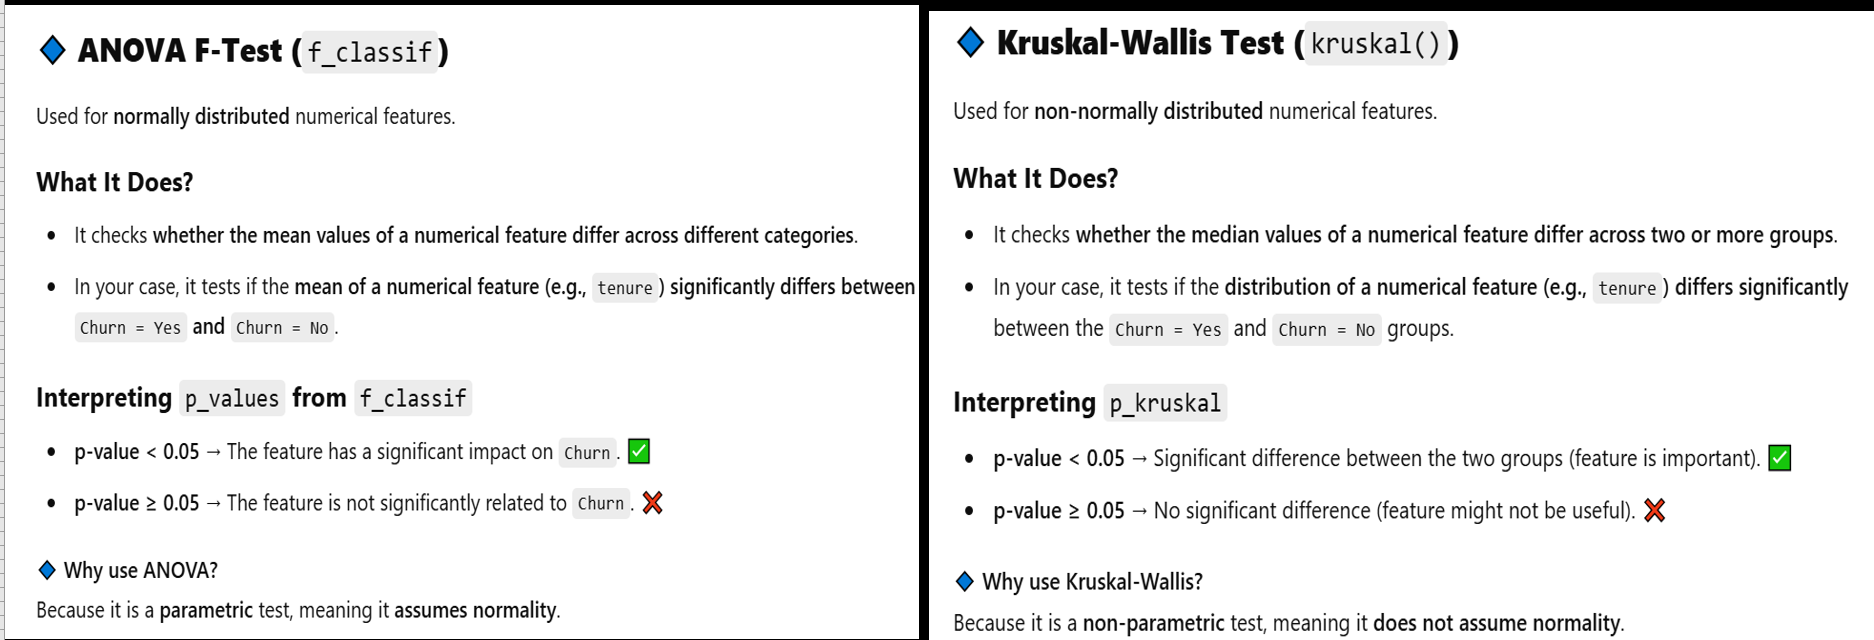

In [15]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

numerical_columns

['SeniorCitizen',
 'tenure',
 'MonthlyCharges',
 'TotalCharges',
 'numAdminTickets',
 'numTechTickets']

In [16]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [17]:
from scipy.stats import shapiro, kruskal
from sklearn.feature_selection import f_classif

# Dictionary to store p-values
num_feature_pvalues = {}

# Check normality and apply appropriate test
for col in numerical_columns:
    # Shapiro-Wilk normality test (p < 0.05 means non-normal distribution)
    stat, p_normal = shapiro(df[col].dropna())
    
    if p_normal > 0.05:  # Data is normally distributed → Use ANOVA F-test
        f_values, p_values = f_classif(df[[col]], df['Churn'])
        num_feature_pvalues[col] = p_values[0]
    else:  # Data is non-normal → Use Kruskal-Wallis test
        stat, p_kruskal = kruskal(df[col][df['Churn'] == 'Yes'], df[col][df['Churn'] == 'No'])
        num_feature_pvalues[col] = p_kruskal

# Select significant numerical features (p-value < 0.05)
feature_engineered_numerical = [key for key, value in num_feature_pvalues.items() if value < 0.05]

print("Significant Numerical Features:", feature_engineered_numerical)

Significant Numerical Features: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'numAdminTickets', 'numTechTickets']


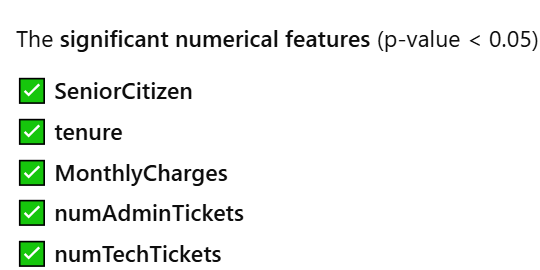

In [18]:
# Combine selected features
feature_engineered = feature_engineered_categorical+feature_engineered_numerical

In [27]:
df2 = df[feature_engineered]
df2.head(n=10)

,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets
0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No,0,1,29.85,29.85,0,0
1,No,No,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No,0,34,56.95,1889.50,0,0
2,No,No,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes,0,2,53.85,108.15,0,0
3,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No,0,45,42.30,1840.75,0,3
4,No,No,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes,0,2,70.70,151.65,0,0
5,No,No,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,Yes,0,8,99.65,820.50,0,0
6,No,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),No,0,22,89.10,1949.40,0,0
7,No,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,No,0,10,29.75,301.90,0,0
8,Yes,No,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,Yes,0,28,104.80,3046.05,0,2
9,No,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),No,0,62,56.15,3487.95,0,0
